In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Checking for missing values

In [5]:
total_mv = data.isnull().sum().sort_values(ascending = False)
percentage = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([total_mv, percentage], keys = ['Total', 'Percentage'], axis = 1)
missing_values

,Total,Percentage
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


Drop the rows containing missing values

In [6]:
data.dropna(axis = 0, inplace = True)

In [7]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### checking for duplicated values

In [8]:
data.duplicated().any()

True

In [9]:
dup = data[data.duplicated(keep = 'first')]
dup.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


In [10]:
df = data.drop_duplicates(keep = 'first')
df.duplicated().any()

False

EDA

* Descriptive statistics

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


1. Minimum value of quantity is negative? it must be positive. 
2. There is UnitPrice of zero, is that make sense? 

Drop the rows containing negative values of quantity and zero values of UnitPrice

In [12]:
df.drop(df.loc[df['Quantity'] < 0].index, inplace = True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df.drop(df.loc[df['UnitPrice'] == 0].index, inplace = True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df.shape

(392692, 8)

Count the total purchase of each customer

In [15]:
purchase = df['CustomerID'].value_counts().reset_index()

In [16]:
purchase.columns = ['CustomerID', 'Purchase count']

In [17]:
purchase

,CustomerID,Purchase count
0,17841.0,7676
1,14911.0,5670
2,14096.0,5111
3,12748.0,4412
4,14606.0,2677
...,...,...
4333,15753.0,1
4334,13106.0,1
4335,17752.0,1
4336,13391.0,1


we can see that there's a potential of user retention

Reformat Timestamps

In [18]:
import dateutil
from datetime import datetime as dt
from pytz import utc

In [19]:
df['datetime'] = df['InvoiceDate'].apply(lambda x: dateutil.parser.parse(x).timestamp())

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df['month'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x,utc).month)
df['day'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x,utc).day)
df['year'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x,utc).year)
df['hour'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x,utc).hour)
df['minute'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x,utc).minute)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,day,year,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26


In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID,datetime,month,day,year,hour,minute
count,392692.000000,392692.000000,392692.000000,3.926920e+05,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,1.310300e+09,7.601871,15.044653,2010.934631,5.721594,30.405972
std,180.492832,22.241836,1713.539549,9.735169e+06,3.415015,8.652531,0.247177,2.276803,17.081307
min,1.000000,0.001000,12346.000000,1.291167e+09,1.000000,1.000000,2010.000000,0.000000,0.000000
25%,2.000000,1.250000,13955.000000,1.302150e+09,5.000000,7.000000,2011.000000,4.000000,16.000000
50%,6.000000,1.950000,15150.000000,1.312089e+09,8.000000,15.000000,2011.000000,6.000000,31.000000
75%,12.000000,3.750000,16791.000000,1.319090e+09,11.000000,22.000000,2011.000000,7.000000,45.000000
max,80995.000000,8142.750000,18287.000000,1.323410e+09,12.000000,31.000000,2011.000000,23.000000,59.000000


#### Cohort analysis for all countries

* adding cohort column

In [23]:
df['cohort'] = df.apply(lambda x: (x['year'] * 100) + (x['month']), axis = 1)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,day,year,hour,minute,cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012


In [25]:
cohorts = df.groupby('CustomerID')['cohort'].min().reset_index()
cohorts.columns = ['CustomerID', 'firstcohort']
cohorts
df_merge = df.merge(cohorts, how = 'left', on = 'CustomerID')

In [26]:
df_merge.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,day,year,hour,minute,cohort,firstcohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012


In [27]:
headers = df_merge['cohort'].value_counts().reset_index()
headers.columns = ['cohort', 'count']
headers = headers.sort_values(['cohort'])['cohort'].to_list()
headers

[201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

In [28]:
df_merge['cohort_distance'] = df_merge.apply(lambda x: (headers.index(x.cohort) - headers.index(x.firstcohort)) if (x['cohort'] != 0 and x['firstcohort'] != 0) else np.nan, axis = 1)

In [29]:
df_merge.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,day,year,hour,minute,cohort,firstcohort,cohort_distance
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,1.323410e+09,12,9,2011,5,50,201112,201108,4
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,1.323410e+09,12,9,2011,5,50,201112,201108,4
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,1.323410e+09,12,9,2011,5,50,201112,201108,4
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,1.323410e+09,12,9,2011,5,50,201112,201108,4
392691,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,1.323410e+09,12,9,2011,5,50,201112,201108,4


In [30]:
cohort_pivot = pd.pivot_table(df_merge, index = 'firstcohort', columns = 'cohort_distance', values = 'CustomerID', aggfunc = pd.Series.nunique)

In [31]:
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
firstcohort,,,,,,,,,,,,,
201012,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
201101,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
201102,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
201103,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
201104,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
201105,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
201106,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
201107,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cohort_pivot = cohort_pivot.div(cohort_pivot[0], axis = 0)
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
firstcohort,,,,,,,,,,,,,
201012,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
201101,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
201102,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
201103,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
201104,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
201105,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
201106,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
201107,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creating heatmap

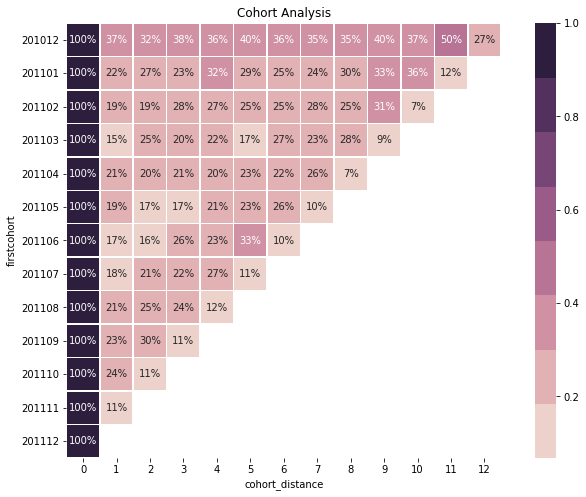

In [33]:
import seaborn as sns

fig_dims = (12,8)
fig, ax = plt.subplots(figsize = fig_dims)
y_labels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
x_labels = range(0, len(y_labels))
plt.yticks(ticks = headers, label = y_labels )
plt.xticks(x_labels, x_labels)
ax.set(xlabel = 'Month after first purchase', ylabel = 'first purchase', title = 'Cohort Analysis')
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidths=.5, cmap=sns.cubehelix_palette(8))

plt.show()

* it can be seen that the customers with the date of first purchase on December 2010 have a good retention rate compared to others.
* user retention rate achieved 50% on November 2011 for the customers who made their first purchase in December 2010

I thought that the demography will influence the purchase of customers, each of the countries has a different customer behavior of purchasing. So that, I decided to divide the cohort analysis by country. 

In [34]:
df_merge['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

Analyze the top 3 countries with the highest total transaction

#### Cohort analysis (United Kingdom)

In [35]:
df_UK = df_merge[df_merge['Country'] == 'United Kingdom']

In [36]:
df_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,day,year,hour,minute,cohort,firstcohort,cohort_distance
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,1,2010,1,26,201012,201012,0


In [37]:
cohort_uk = pd.pivot_table(df_UK, index = 'firstcohort', columns = 'cohort_distance', values = 'CustomerID', aggfunc = pd.Series.nunique)

In [38]:
cohort_uk = cohort_uk.div(cohort_uk[0], axis = 0)
cohort_uk

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
firstcohort,,,,,,,,,,,,,
201012,1.0,0.354601,0.322699,0.373006,0.359509,0.396319,0.357055,0.341104,0.354601,0.398773,0.366871,0.496933,0.267485
201101,1.0,0.212291,0.259777,0.234637,0.332402,0.276536,0.251397,0.243017,0.301676,0.326816,0.354749,0.120112,NaN
201102,1.0,0.188235,0.194118,0.285294,0.288235,0.252941,0.255882,0.282353,0.264706,0.305882,0.073529,NaN,NaN
201103,1.0,0.152745,0.260143,0.198091,0.224344,0.164678,0.264916,0.229117,0.284010,0.090692,NaN,NaN,NaN
201104,1.0,0.209386,0.202166,0.216606,0.202166,0.220217,0.220217,0.263538,0.072202,NaN,NaN,NaN,NaN
201105,1.0,0.187500,0.171875,0.171875,0.207031,0.226562,0.265625,0.089844,NaN,NaN,NaN,NaN,NaN
201106,1.0,0.177570,0.144860,0.238318,0.238318,0.322430,0.098131,NaN,NaN,NaN,NaN,NaN,NaN
201107,1.0,0.177515,0.195266,0.230769,0.278107,0.106509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,1.0,0.226950,0.226950,0.241135,0.120567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


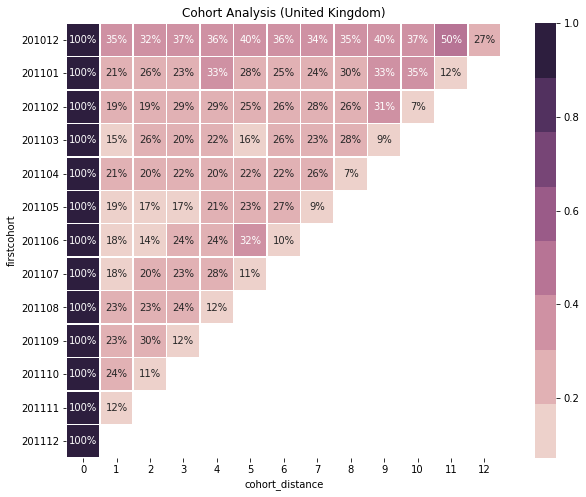

In [39]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize = fig_dims)
y_labels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
x_labels = range(0, len(y_labels))
plt.yticks(ticks = headers, label = y_labels)
plt.xticks(x_labels)
ax.set(xlabel = 'Month after first purchase', ylabel = 'first purchase', title = 'Cohort Analysis (United Kingdom)')
sns.heatmap(cohort_uk, annot = True, fmt = '.0%', mask = cohort_uk.isnull(), ax = ax, square = True, linewidths = .5, 
           cmap =sns.cubehelix_palette(8))

* The customers with the date of first purchase in December 2012 have a good retention rate compared to others. It achieved a 50% of retention rate in November 2011

#### Cohort Analysis (Germany)

In [40]:
df_germany = df_merge[df_merge['Country'] == 'Germany']
df_germany.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,day,year,hour,minute,cohort,firstcohort,cohort_distance
1073,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany,1.291183e+09,12,1,2010,6,4,201012,201012,0
1074,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany,1.291183e+09,12,1,2010,6,4,201012,201012,0
1075,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany,1.291183e+09,12,1,2010,6,4,201012,201012,0
1076,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany,1.291183e+09,12,1,2010,6,4,201012,201012,0
1077,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany,1.291183e+09,12,1,2010,6,4,201012,201012,0


In [41]:
cohort_germany = pd.pivot_table(df_germany, index = 'firstcohort', columns = 'cohort_distance', values = 'CustomerID', aggfunc = pd.Series.nunique)
cohort_germany = cohort_germany.div(cohort_germany[0], axis = 0)
cohort_germany

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
firstcohort,,,,,,,,,,,,,
201012,1.0,0.500000,0.388889,0.666667,0.611111,0.611111,0.444444,0.611111,0.444444,0.500000,0.611111,0.888889,0.222222
201101,1.0,0.315789,0.368421,0.052632,0.315789,0.421053,0.210526,0.315789,0.157895,0.315789,0.421053,0.052632,NaN
201102,1.0,NaN,0.250000,0.500000,NaN,NaN,0.500000,NaN,0.500000,0.500000,NaN,NaN,NaN
201103,1.0,0.200000,0.400000,NaN,0.400000,0.200000,0.400000,0.200000,0.200000,NaN,NaN,NaN,NaN
201104,1.0,0.200000,0.400000,0.200000,0.200000,0.400000,0.200000,0.200000,0.200000,NaN,NaN,NaN,NaN
201105,1.0,NaN,0.200000,0.200000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201106,1.0,NaN,0.666667,0.666667,0.333333,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201107,1.0,0.285714,0.571429,0.285714,0.142857,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,1.0,0.166667,0.666667,0.333333,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


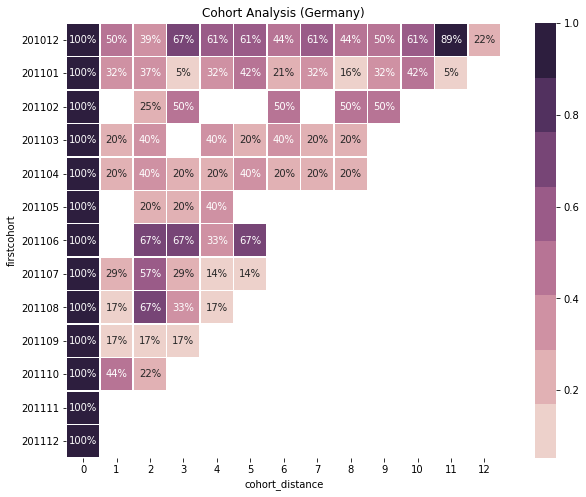

In [42]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize = fig_dims)
y_labels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
x_labels = range(0, len(y_labels))
plt.yticks(ticks = headers, label = y_labels)
plt.xticks(x_labels)
ax.set(xlabel = 'Month after first purchase', ylabel = 'first purchase', title = 'Cohort Analysis (Germany)')
sns.heatmap(cohort_germany, annot = True, fmt = '.0%', mask = cohort_germany.isnull(), ax = ax, square = True, linewidths = .5, 
           cmap =sns.cubehelix_palette(8))

* Customers who made their first purchase in Feb 2011, May 2011, June 2011, and Nov 2011 did not make another purchase in the following month. In those months, the user retention rate in the following month after the first purchase was 0%.
* Customers who made their first purchase in Feb 2011 had a low retention rate, moreover, the retention rate was 0% in March 2011, June 2011, July 2011, Sept 2011, and Dec 2011

#### Cohort Analysis (France)

In [43]:
df_france = df_merge[df_merge['Country'] == 'France']

In [44]:
df_france.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,day,year,hour,minute,cohort,firstcohort,cohort_distance
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,1.291168e+09,12,1,2010,1,45,201012,201012,0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,1.291168e+09,12,1,2010,1,45,201012,201012,0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,1.291168e+09,12,1,2010,1,45,201012,201012,0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,1.291168e+09,12,1,2010,1,45,201012,201012,0
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,1.291168e+09,12,1,2010,1,45,201012,201012,0


In [45]:
cohort_france = pd.pivot_table(df_france, index = 'firstcohort', columns = 'cohort_distance', values = 'CustomerID', aggfunc = pd.Series.nunique)
cohort_france

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
firstcohort,,,,,,,,,,,,,
201012,15.0,7.0,6.0,7.0,5.0,8.0,9.0,7.0,5.0,9.0,8.0,10.0,3.0
201101,17.0,5.0,6.0,4.0,4.0,5.0,4.0,4.0,7.0,5.0,5.0,4.0,NaN
201102,6.0,NaN,NaN,3.0,2.0,2.0,2.0,2.0,NaN,3.0,NaN,NaN,NaN
201103,4.0,1.0,1.0,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
201104,4.0,2.0,NaN,NaN,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
201105,10.0,4.0,1.0,3.0,3.0,4.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN
201106,5.0,NaN,1.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
201107,3.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,5.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
cohort_france = cohort_france.div(cohort_france[0], axis = 0)
cohort_france

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
firstcohort,,,,,,,,,,,,,
201012,1.0,0.466667,0.400000,0.466667,0.333333,0.533333,0.600000,0.466667,0.333333,0.600000,0.533333,0.666667,0.2
201101,1.0,0.294118,0.352941,0.235294,0.235294,0.294118,0.235294,0.235294,0.411765,0.294118,0.294118,0.235294,NaN
201102,1.0,NaN,NaN,0.500000,0.333333,0.333333,0.333333,0.333333,NaN,0.500000,NaN,NaN,NaN
201103,1.0,0.250000,0.250000,NaN,0.250000,NaN,0.500000,0.250000,NaN,NaN,NaN,NaN,NaN
201104,1.0,0.500000,NaN,NaN,0.250000,0.500000,NaN,0.500000,NaN,NaN,NaN,NaN,NaN
201105,1.0,0.400000,0.100000,0.300000,0.300000,0.400000,0.500000,0.400000,NaN,NaN,NaN,NaN,NaN
201106,1.0,NaN,0.200000,0.600000,NaN,0.200000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN
201107,1.0,0.333333,0.333333,NaN,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108,1.0,0.200000,0.200000,0.200000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


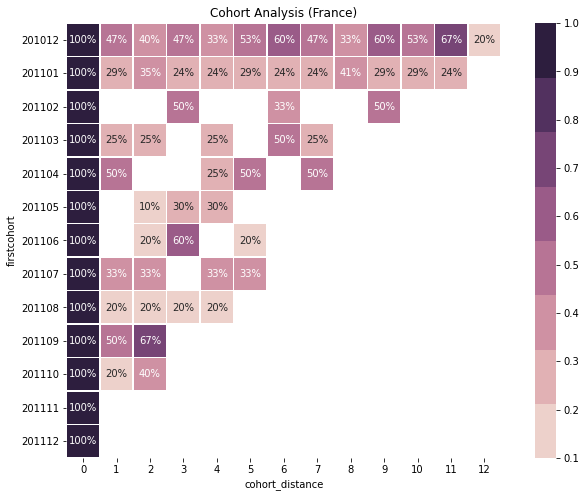

In [47]:
fig,ax = plt.subplots(figsize = fig_dims)
ylabels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
xlabels = range(0, len(ylabels))
plt.yticks(ticks = headers, label = y_labels)
plt.xticks(x_labels)
ax.set(xlabel = 'Month after first purchase', ylabel = 'first purchase', title = 'Cohort Analysis (France)')
sns.heatmap(cohort_france, annot = True, fmt = '.0%', mask = cohort_germany.isnull(), ax = ax, square = True, linewidths = .5, 
           cmap =sns.cubehelix_palette(8))

* The customers with the date of first purchase in December 2012 have a good retention rate compared to others.
* Customers who made their first purchase in February 2011 had a low retention rate. It can be seen that customers make purchases again after 2 months from their first purchase.